<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linearl

In [3]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0])
# A*Beta = b
#A^-1*A*Beta = A^-1 * b 
#I_2*Beta = A^-1 * b 

In [6]:
# Beta = A^-1 * b
Beta = np.linalg.inv(A).dot(b)
Beta

array([ 1., -1.])

In [7]:
np.dot(np.linalg.inv(A),b)

array([ 1., -1.])

In [11]:
Beta[0], Beta[1]

(1.0, -1.0)

$$ y=1  -x $$

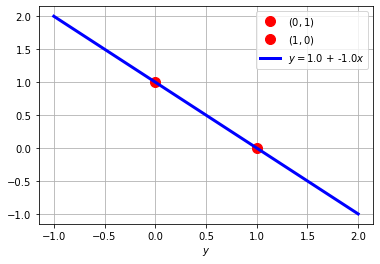

In [12]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(0,1,'ro',ms=10, label='$(0,1)$')
plt.plot(1,0,'ro',ms=10, label='$(1,0)$')

x_num = np.linspace(-1,2)
y_num = Beta[0] + Beta[1]*x_num

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [13]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
b=np.array([1,0,1])



In [ ]:
help(np.linalg.solve)

In [14]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
Beta = np.linalg.inv(A).dot(b)
Beta

array([0., 0., 1.])

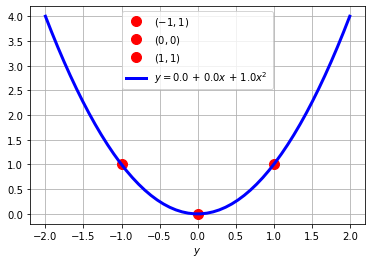

In [15]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(-1,1,'ro',ms=10, label='$(-1,1)$')
plt.plot(0,0,'ro',ms=10, label='$(0,0)$')
plt.plot(1,1,'ro',ms=10, label='$(1,1)$')

x_num = np.linspace(-2,2)
y_num = Beta[0] + Beta[1]*x_num + Beta[2]*x_num**2

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$ + {np.round(Beta[2],2)}$x^2$ ')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [16]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 +2*x+np.random.normal(loc=0, scale=2, size=(N,))

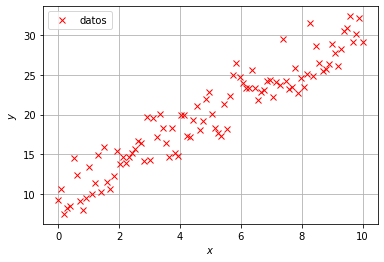

In [17]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [19]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [21]:
help(opt.optimize)

Help on module scipy.optimize.optimize in scipy.optimize:

NAME
    scipy.optimize.optimize

DESCRIPTION
    #__docformat__ = "restructuredtext en"
    # ******NOTICE***************
    # optimize.py module by Travis E. Oliphant
    #
    # You may copy and use this module as you see fit with no
    # guarantee implied provided you keep this notice in all copies.
    # *****END NOTICE************

CLASSES
    builtins.UserWarning(builtins.Warning)
        OptimizeWarning
    builtins.dict(builtins.object)
        OptimizeResult
    
    class OptimizeResult(builtins.dict)
     |  Represents the optimization result.
     |  
     |  Attributes
     |  ----------
     |  x : ndarray
     |      The solution of the optimization.
     |  success : bool
     |      Whether or not the optimizer exited successfully.
     |  status : int
     |      Termination status of the optimizer. Its value depends on the
     |      underlying solver. Refer to `message` for details.
     |  message : str

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [24]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [25]:
y

array([ 9.25148709, 10.57388796,  7.49868709,  8.27705489,  8.46996331,
       14.52522988, 12.44098619,  9.17564398,  7.97550736,  9.49296415,
       13.45047471,  9.94394385, 11.33236172, 14.88360126, 10.22367437,
       15.97019729, 11.56998315, 10.6633264 , 12.2966903 , 15.44278097,
       13.737011  , 14.61051037, 13.95124862, 14.66798499, 15.20031089,
       15.67067266, 16.68181721, 16.40985555, 14.11212119, 19.75394656,
       14.33902298, 19.53830759, 17.22493251, 20.06325128, 18.27181403,
       16.45862497, 14.6782179 , 18.30680637, 15.10332894, 14.84502584,
       19.97882718, 19.95462776, 17.30382487, 17.16575785, 19.26855163,
       21.03499329, 18.03951151, 19.19722519, 21.96025978, 22.7981354 ,
       20.09874457, 18.35347269, 17.61741584, 17.34540776, 21.36628376,
       18.24298136, 22.36154782, 25.03727912, 26.52525164, 24.72627539,
       23.9426396 , 23.29061125, 23.37579235, 25.56853647, 23.37321412,
       21.88651821, 22.87347399, 23.07120096, 24.24346683, 24.39

In [27]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [28]:
beta_ini = [0,0]

In [29]:
solucion = opt.minimize(fun = min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 2.0863389896935596
 hess_inv: array([[ 3.9400239 , -0.58744049],
       [-0.58744049,  0.11701095]])
      jac: array([-2.98023224e-08, -2.08616257e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([9.67386437, 2.06072797])

In [31]:
Beta = solucion.x
Beta

array([9.67386437, 2.06072797])

$$\hat{f(x)}=9.67 + 2.06*x$$

¿Qué tan bien luce el ajuste?

In [ ]:
# Coeficientes \beta_0 y \beta_1


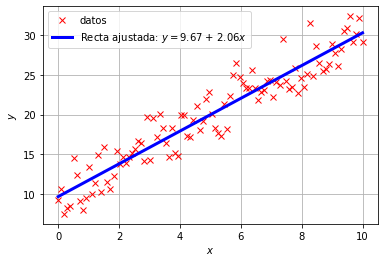

In [32]:
# Grafica de los puntos y la recta ajustada
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat = Beta[0] + Beta[1]*x

plt.plot(x,f_hat,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [35]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x=np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3, size=(N,))


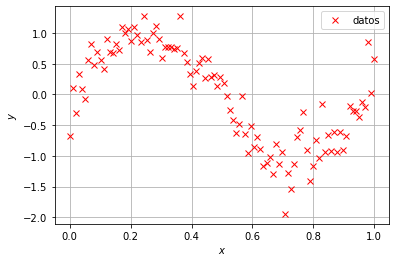

In [36]:
# Graficar

plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [38]:
def min_sqe_1(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe
beta_ini_1=[0,0]

In [40]:
# Resolver
solucion_1 = opt.minimize(fun=min_sqe_1, x0=beta_ini_1, args=(x,y))
Beta_1=solucion_1.x
Beta_1

array([ 0.83888054, -1.72369007])

**Veamos $\beta$ para el ajuste con recta**

In [41]:
Beta_1

array([ 0.83888054, -1.72369007])

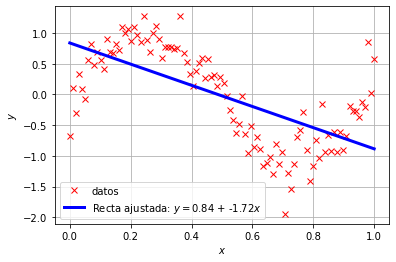

In [42]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat_1 = Beta_1[0] + Beta_1[1]*x

plt.plot(x,f_hat_1,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_1[0],2)} + {np.round(Beta_1[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [43]:
# Definir funcion objetivo y semilla
def min_sqe_2(beta,x_points,y_points):
    n = len(x_points)
    #modelo polinomial de grado 2
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

beta_ini_2=[0,0,0]

In [44]:
# Resolver
solucion_2 = opt.minimize(fun=min_sqe_2, x0=beta_ini_2,args=(x,y))
solucion_2

      fun: 0.17612873517029837
 hess_inv: array([[   8.41679376,  -34.01361824,   28.3685377 ],
       [ -34.01361824,  183.5503299 , -171.79393619],
       [  28.3685377 , -171.79393619,  171.21663468]])
      jac: array([-4.33996320e-07, -2.73808837e-07, -2.23517418e-07])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([ 0.94307726, -2.35526802,  0.6315793 ])

**Veamos $\beta$ para el ajuste con parábola**

In [46]:
# Mostrar coeficientes
Beta_2 = solucion_2.x
Beta_2

array([ 0.94307726, -2.35526802,  0.6315793 ])

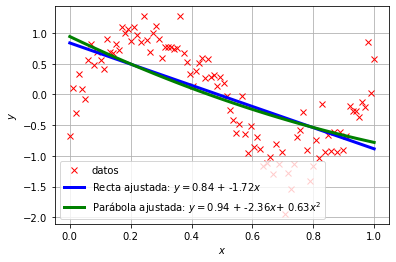

In [48]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat_1 = Beta_1[0] + Beta_1[1]*x
f_hat_2 = Beta_2[0] + Beta_2[1]*x + Beta_2[2]*x**2

plt.plot(x,f_hat_1,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_1[0],2)} + {np.round(Beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'g', lw=3, label=f'Parábola ajustada: $y=${np.round(Beta_2[0],2)} + {np.round(Beta_2[1],2)}$x$+ {np.round(Beta_2[2],2)}$x^2$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [ ]:
# Definir funcion objetivo y semilla


**Veamos $\beta$ para el ajuste con cúbica**

In [ ]:
# Mostrar coeficientes


In [ ]:
# Graficar recta, parabola y cubica


Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [ ]:
# Definimos funcion objetivo y semilla


In [ ]:
# Resolvemos


**De nuevo, veamos $\beta$**

In [ ]:
# Mostrar coeficientes


**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [ ]:
# Mostrar coeficientes


In [ ]:
# Grafica de ajustes
# Grafica de los puntos y la recta ajustada



Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [ ]:
# Función objetivo ajuste polinomio grado N


In [ ]:
# Error cuadratico


In [ ]:
#Plotear la lista de los errores de los ajustes de curvas


En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [ ]:
# Grafica de los puntos y la recta ajustada
# Mostrar coeficientes


### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [ ]:
# Graficar los modelos obtenidos de grado 7 (con regularización: lasso, ridge)




## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

Solucionamos el problema normalmente...

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

Mejor...

## 5. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?


In [ ]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [ ]:
data.head()

# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Tendrán que mandarme un mensaje con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: por definir